##Connecting to Google Drive for the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from tensorflow import keras
import json
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Add, Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import ResNet50

##Data Preprocessing

TensorFlow's image_dataset_from_directory function was used to load the train, test and validation dataset from a google drive directory containing images. Labels are inferred from the directory structure, with one-hot encoded categorical labels generated for each class. Images are resized to 64x64 pixels and loaded in RGB color format. The dataset is shuffled randomly with a batch size of 32.

##Training Data preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FVR_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1921 files belonging to 20 classes.


##Validation Data Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FVR_Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 306 files belonging to 20 classes.


## Test Data Preprocessing


In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FVR_Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 282 files belonging to 20 classes.


#Building the ResNet50 Model

In [8]:
resnet_model = ResNet50(weights='imagenet', include_top=False)

num_of_classes = 20

# Freezing the layers in base model
for layer in resnet_model.layers:
  layer.trainable = False

# Get base model output
resnet_model_ouput = resnet_model.output

# Adding our own layer
x = GlobalAveragePooling2D()(resnet_model_ouput)
# Adding fully connected layer
x = Dense(512, activation='relu')(x)
x = Dense(num_of_classes, activation='softmax', name='fcnew')(x)
# Adding Dropout for regularization
x = Dropout(0.1)(x)

model = Model(inputs=resnet_model.input, outputs=x)

94765736/94765736 [==============================] - 3s 0us/step


##Compiling the Resnet50 model

In [9]:
# Compile resnet model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print the summary of model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [10]:
#Storing the resnet model for the later history
hist = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
61/61 [==============================] - 617s 9s/step - loss: 3.5017 - accuracy: 0.5112 - val_loss: 0.4913 - val_accuracy: 0.8562
Epoch 2/10
61/61 [==============================] - 81s 1s/step - loss: 1.9756 - accuracy: 0.7553 - val_loss: 0.2075 - val_accuracy: 0.9542
Epoch 3/10
61/61 [==============================] - 83s 1s/step - loss: 1.8169 - accuracy: 0.8204 - val_loss: 0.2422 - val_accuracy: 0.9216
Epoch 4/10
61/61 [==============================] - 90s 1s/step - loss: 1.8164 - accuracy: 0.8522 - val_loss: 0.2021 - val_accuracy: 0.9379
Epoch 5/10
61/61 [==============================] - 88s 1s/step - loss: 1.7478 - accuracy: 0.8704 - val_loss: 0.1464 - val_accuracy: 0.9706
Epoch 6/10
61/61 [==============================] - 81s 1s/step - loss: 1.5037 - accuracy: 0.9032 - val_loss: 0.2217 - val_accuracy: 0.9346
Epoch 7/10
61/61 [==============================] - 80s 1s/step - loss: 1.4945 - accuracy: 0.9021 - val_loss: 0.1868 - val_accuracy: 0.9542
Epoch 8/10
61/61 [=

In [11]:
#Evaluating the training data set
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)


61/61 [==============================] - 69s 1s/step - loss: 0.0113 - accuracy: 0.9984
Training accuracy: 0.99843829870224


In [12]:
#Evaluating the validation data set
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)


10/10 [==============================] - 11s 529ms/step - loss: 0.1656 - accuracy: 0.9542
Validation accuracy: 0.9542483687400818


In [13]:
#Evaluating the test data set
test_loss,test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

9/9 [==============================] - 66s 423ms/step - loss: 0.2756 - accuracy: 0.9326
Test accuracy: 0.932624101638794


##Storing the built resnet model

The ResNet50 model has been trained to recognize fruits and vegetables. Saving the model in this way allows it to be reused later, in a user interface (UI) application where it can identify fruits and vegetables from the uploaded images.

In [14]:
#Saving the trained model
model.save('resnet_trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
#Saving history in json format
with open('training_hist.json','w') as f:
  json.dump(hist.history,f)


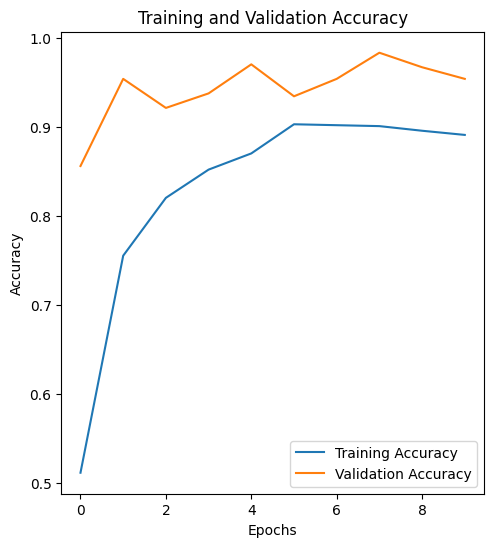

In [16]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

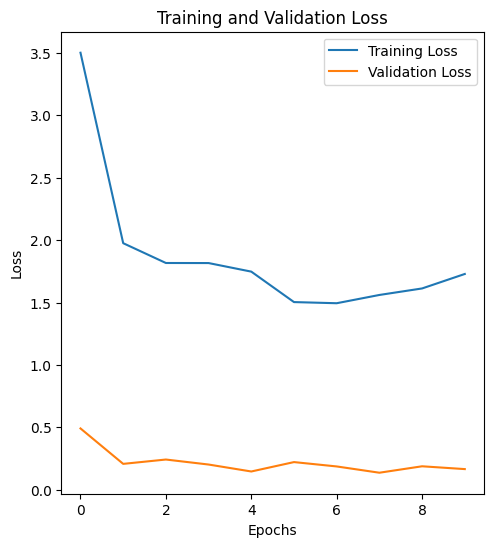

In [17]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


##Overall Summary
The code begins by initializing a ResNet50 model, excluding the top layer. The number of classes is set to 20. Then, the layers of the ResNet model are frozen to prevent them from being updated during training.

**Fine tuning -** A new layer is added to the model, consisting of a global average pooling layer followed by two dense (fully connected) layers with ReLU activation and softmax activation, respectively. A dropout layer with a rate of 0.1 is added for regularization and to avoid overfitting issue. The model is compiled with categorical cross-entropy loss and the Adam optimizer, and accuracy is used as the evaluation metric.

The model is trained using the fit() function on training and validation datasets for 10 epochs. The training results indicate decreasing loss and increasing accuracy over epochs, indicates that the model is learning effectively. There are no underfitting or overfitting issues as per the plots. The overall training accuracy is approximately 90%.